In [1]:
import tensorflow as tf
import numpy
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
print(data.train.num_examples)
print(data.test.num_examples)
print(data.train.images.shape)
print(data.test.images.shape)
print(data.train.labels.shape)
print(data.test.labels.shape)

55000
10000
(55000, 784)
(10000, 784)
(55000,)
(10000,)


In [4]:
x_train ,y_train = data.train.images , data.train.labels
x_test ,y_test = data.test.images , data.test.labels 

x_train = x_train.reshape([-1,28,28,1])
x_test = x_test.reshape([-1,28,28,1])

the label is: 4


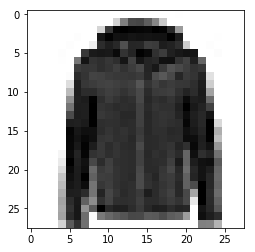

In [5]:
def show(image_num):
    plt.imshow(1-x_train[image_num-1][:, :, 0], cmap='gray')
    print("the label is:",y_train[image_num-1])

image_num = 1
show(image_num)

In [6]:
x_train = x_train/255
x_test = x_test/255

y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [15]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (5, 5), padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64, (5, 5), padding="same"),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
    

In [16]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, validation_split=0.05, batch_size=100, epochs=30, verbose=2)

Train on 52250 samples, validate on 2750 samples
Epoch 1/30
 - 245s - loss: 0.7581 - acc: 0.7193 - val_loss: 0.4744 - val_acc: 0.8171
Epoch 2/30
 - 248s - loss: 0.4707 - acc: 0.8267 - val_loss: 0.3890 - val_acc: 0.8542
Epoch 3/30
 - 246s - loss: 0.3986 - acc: 0.8537 - val_loss: 0.3453 - val_acc: 0.8684
Epoch 4/30
 - 250s - loss: 0.3560 - acc: 0.8694 - val_loss: 0.3236 - val_acc: 0.8738
Epoch 5/30
 - 250s - loss: 0.3281 - acc: 0.8805 - val_loss: 0.3104 - val_acc: 0.8811
Epoch 6/30
 - 255s - loss: 0.3061 - acc: 0.8877 - val_loss: 0.2802 - val_acc: 0.8920
Epoch 7/30
 - 259s - loss: 0.2862 - acc: 0.8948 - val_loss: 0.2740 - val_acc: 0.9007
Epoch 8/30
 - 470s - loss: 0.2691 - acc: 0.9008 - val_loss: 0.2574 - val_acc: 0.9033
Epoch 9/30
 - 251s - loss: 0.2558 - acc: 0.9044 - val_loss: 0.2639 - val_acc: 0.9011
Epoch 10/30
 - 242s - loss: 0.2446 - acc: 0.9085 - val_loss: 0.2511 - val_acc: 0.9044
Epoch 11/30
 - 260s - loss: 0.2299 - acc: 0.9134 - val_loss: 0.2470 - val_acc: 0.9095
Epoch 12/30
 -

In [18]:
_,test_accuracy = model.evaluate(x_test, y_test, verbose=0)

In [19]:
print(test_accuracy)

0.9194
